In [1]:
#! conda install -c conda-forge statsmodels -y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf            #. 자기 상관 함수는 시계열 데이터의 현재 값이 과거의 값과 얼마나 연관되어 있는지를 나타내는 통계적 도구
from statsmodels.tsa.stattools import adfuller                #이 검정은 시계열 데이터가 단위근(unit root)을 가지는지, 즉 데이터가 비정상인지 정상인지 확인하는 데 사용
from statsmodels.tsa.seasonal import seasonal_decompose, STL  #시계열 데이터를 계절성, 추세, 그리고 잔차로 분해하는 데 사용

In [3]:
df=pd.read_csv("data/jj.csv")
df["year"]=pd.DatetimeIndex(df["date"]).year            #DatetimeIndex는 날짜와 시간 데이터를 처리하기 위해 pandas에서 사용하는 객체입니다.
                                                        #.year: DatetimeIndex 객체의 .year 속성은 날짜에서 연도만 추출하여 반환

In [4]:
df["year"]

0     1960
1     1960
2     1960
3     1960
4     1961
      ... 
79    1979
80    1980
81    1980
82    1980
83    1980
Name: year, Length: 84, dtype: int32

In [5]:
advanced_decomposition=STL(df.data, period=4).fit()                   #월별 데이터에서 분기별 주기를 사용하려면 period=4를 설정합니다.
                                                                      #.fit(): STL 객체에 .fit() 메서드를 호출하여 시계열 데이터의 계절성, 추세, 잔차를 추정합니다.

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)
ax1.plot(advacned_decompositon.observed)
ax1.set_ylabel("observed")
ax2.plot(advacned_decompositon.trend)
ax2.set_ylabel("trend")
ax3.plot(advacned_decompositon.seasonal)
ax3.set_ylabel("seasonal")
ax4.plot(advacned_decompositon.resid)
ax4.set_ylabel("resid")
plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)
fig.autofmt_xdate()
plt.tight_layout

In [6]:
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


In [7]:
df.tail()

,date,data,year
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

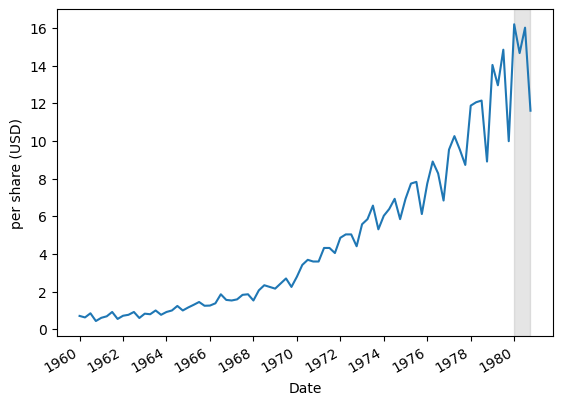

In [8]:
fig, ax = plt.subplots()

ax.plot(df["date"], df["data"])
ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)") 
ax.axvspan(80,83, color="#808080", alpha=0.2)                                    # 특정 영역을 색칠 (예: 회색)
plt.xticks(
    np.arange(0,85,8),
    [1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980]
)
fig.autofmt_xdate()                                                              # x축 날짜 포맷 자동 조정
plt.tight_layout                                                                 # 레이아웃 자동 조정

### 평균값 예측 모델

In [9]:
train=df[:-4]         # 데이터프레임 df에서 마지막 4개의 데이터를 제외한 나머지 데이터를 훈련 세트로 설정합니다.
test=df[-4:]          # 데이터프레임 df에서 마지막 4개의 데이터를 테스트 세트로 설정합니다.


In [10]:
#historical_mean을 계산하는 코드의 목적은 훈련 세트의 data 열에 대한 평균 값을 구하여 그 값을 저장하는 것입니다. 
#이 값은 시계열 분석에서 데이터의 평균적인 수준을 나타내며, 간단한 예측 모델(예: 평균 회귀)에서 기준값으로 사용할 수 있습니다.

historical_mean=np.mean(train['data'])

historical_mean

4.308499987499999

In [11]:
test.loc[:, "pred_mean"]=historical_mean                           # 테스트 데이터에 평균값을 예측값으로 추가

C:\Users\user\AppData\Local\Temp\ipykernel_5012\3865860595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"]=historical_mean                           # 테스트 데이터에 평균값을 예측값으로 추가


In [12]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true- y_pred)/y_true)) *100

In [13]:
#mape_historical_mean을 계산하는 과정에서, test 데이터프레임의 data 열과 pred_mean 열을 사용하여 MAPE(Mean Absolute Percentage Error)를 평가합니다.
#이 경우, pred_mean 열은 훈련 데이터의 평균값을 테스트 데이터의 모든 예측값으로 사용하는 간단한 예측 모델입니다.
mape_historical_mean=mape(test['data'],test['pred_mean'])
mape_historical_mean

70.00752579965119

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

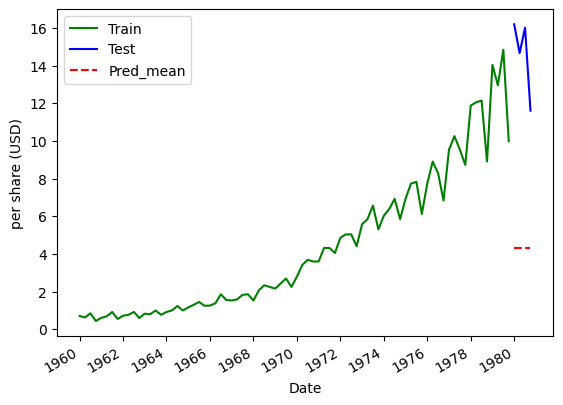

In [14]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"],"g-",label="Train")
ax.plot(test["date"], test["data"],"b-",label="Test")
ax.plot(test["date"], test["pred_mean"],"r--",label="Pred_mean")
ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)") 
ax.legend(loc=2)

plt.xticks(
    np.arange(0,85,8),
    [1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980]
)
fig.autofmt_xdate()                                                              # x축 날짜 포맷 자동 조정
plt.tight_layout                                                                 # 레이아웃 자동 조정

### MA모델

In [15]:
last_year_mean= np.mean(train['data'][-4:])
test.loc[:,'pred_last_year_mean']=last_year_mean
mape_last_year_mean=mape(test['data'],test['pred_last_year_mean'])
mape_last_year_mean

C:\Users\user\AppData\Local\Temp\ipykernel_5012\1115659306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_last_year_mean']=last_year_mean


15.5963680725103

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

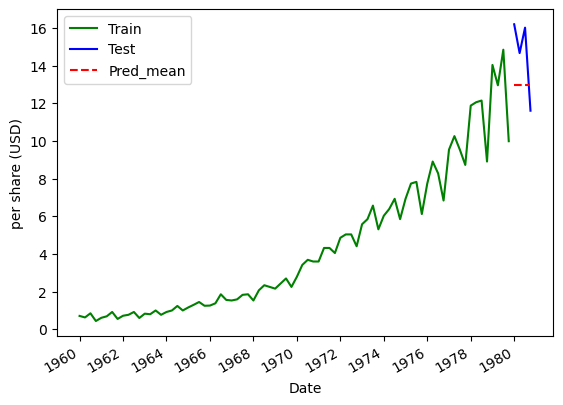

In [16]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"],"g-",label="Train")
ax.plot(test["date"], test["data"],"b-",label="Test")
ax.plot(test["date"], test["pred_last_year_mean"],"r--",label="Pred_mean")
ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)") 
ax.legend(loc=2)

plt.xticks(
    np.arange(0,85,8),
    [1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980]
)
fig.autofmt_xdate()                                                              # x축 날짜 포맷 자동 조정
plt.tight_layout                                                                 # 레이아웃 자동 조정

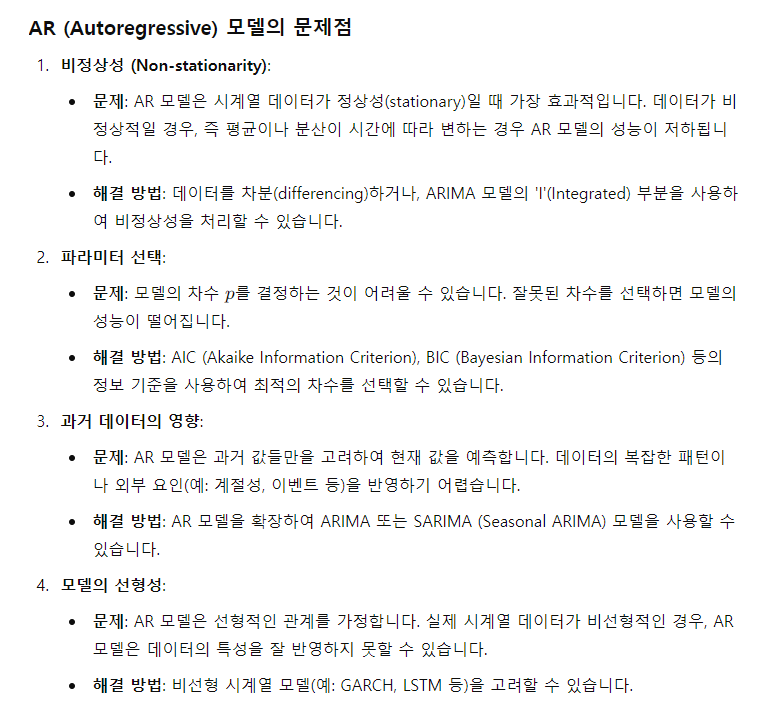
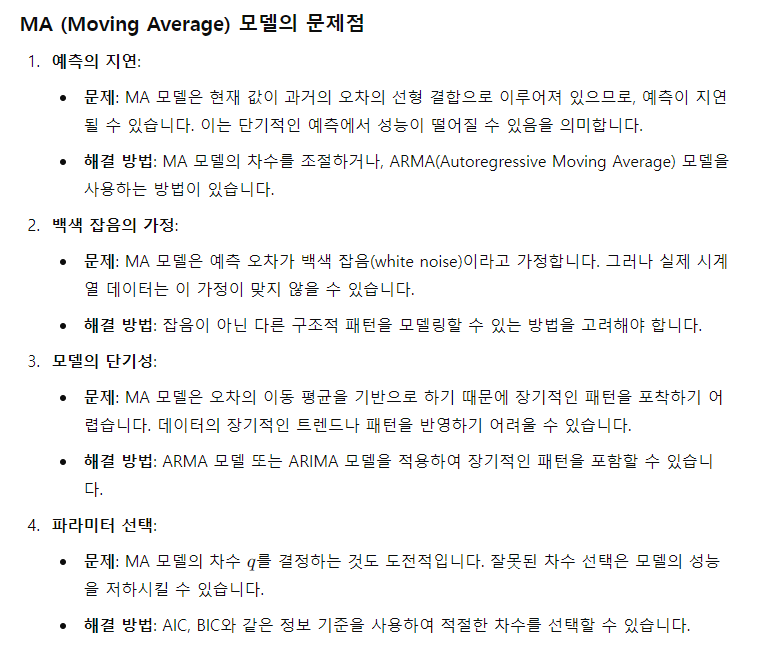

In [17]:
test.loc[:,"pred_last_season"] = train["data"][-4:].values
mape_last_year_mean = mape(test["data"], test["pred_last_season"])
mape_last_year_mean

C:\Users\user\AppData\Local\Temp\ipykernel_5012\2804004222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"pred_last_season"] = train["data"][-4:].values


11.561658552433654

([<matplotlib.axis.XTick at 0x275f39d2060>,
 [Text(0, 0, '1960'),
  Text(8, 0, '1962'),
  Text(16, 0, '1964'),
  Text(24, 0, '1966'),
  Text(32, 0, '1968'),
  Text(40, 0, '1970'),
  Text(48, 0, '1972'),
  Text(56, 0, '1974'),
  Text(64, 0, '1976'),
  Text(72, 0, '1978'),
  Text(80, 0, '1980')])

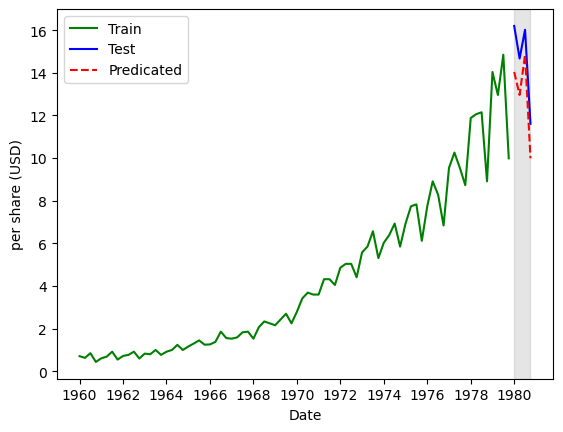

In [18]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g-", label="Train")
ax.plot(test["date"], test["data"], "b-", label="Test")
ax.plot(test["date"], test["pred_last_season"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

### 참고사항

In [19]:
def simulate_process(is_stationary):
    np.random.seed(42)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i + 1 < 400:
            process[i + 1] = alpha * process[i] + np.random.standard_normal()
        else:
            break

    return process

In [20]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

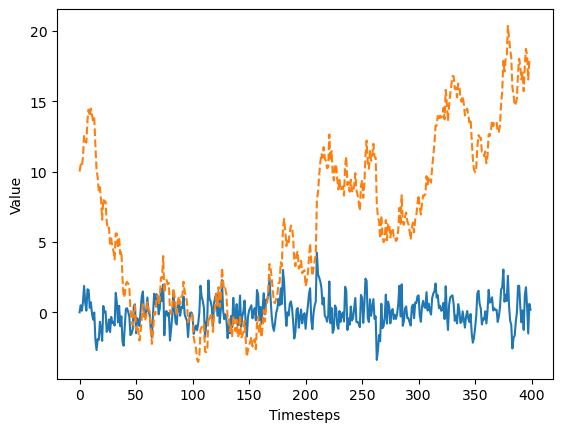

In [21]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle="-", label="stationary")
ax.plot(non_stationary, linestyle="--", label="stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.tight_layout

 ### 랜덤 워크 시계열

In [22]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

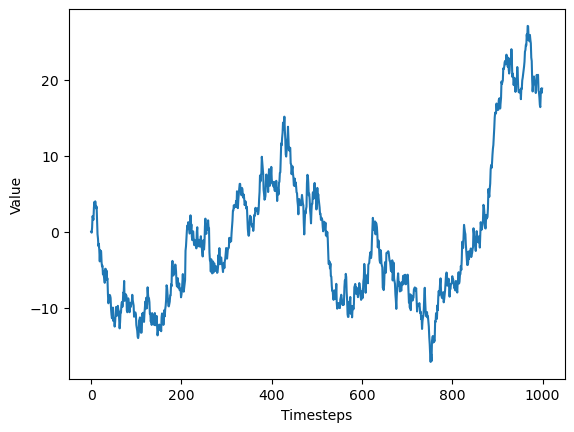

In [23]:
fig, ax = plt.subplots()

ax.plot(random_walk, linestyle="-", label="stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.tight_layout

In [26]:
ADF_result = adfuller(random_walk)
print("ADF Statistic:", ADF_result[0])         #ADF 통계량이 더 작은 값일수록 시계열이 정상성일 가능성이 높습니다. 즉, ADF 통계량이 임계값보다 작으면 시계열이 정상적이라는 결론을 내릴 수 있습니다.
print("p-value:", ADF_result[1])               #일반적으로 p-값이 0.05보다 작으면 귀무가설을 기각하고 시계열이 정상적이라고 결론지을 수 있습니다.

ADF Statistic: -0.9659524876918751
p-value: 0.7654789696692581


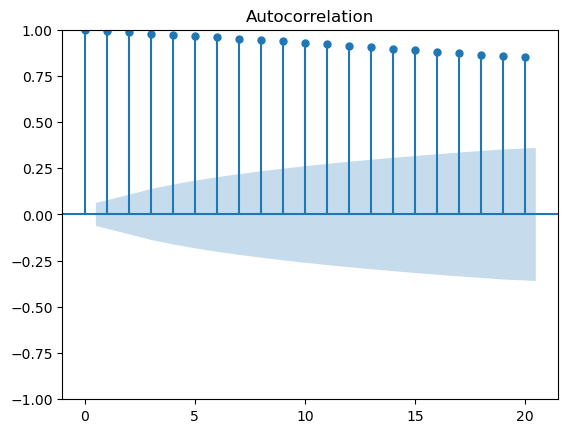

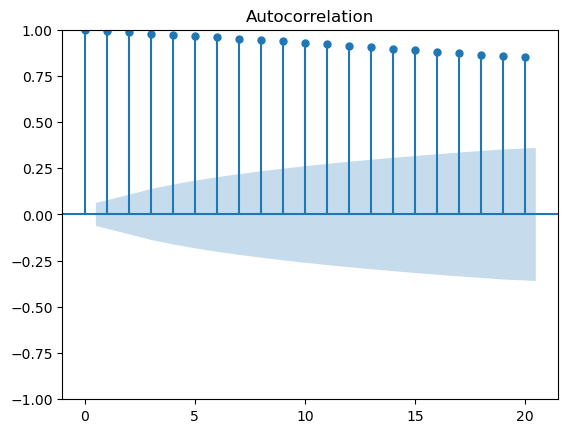

In [25]:
plot_acf(random_walk, lags=20)

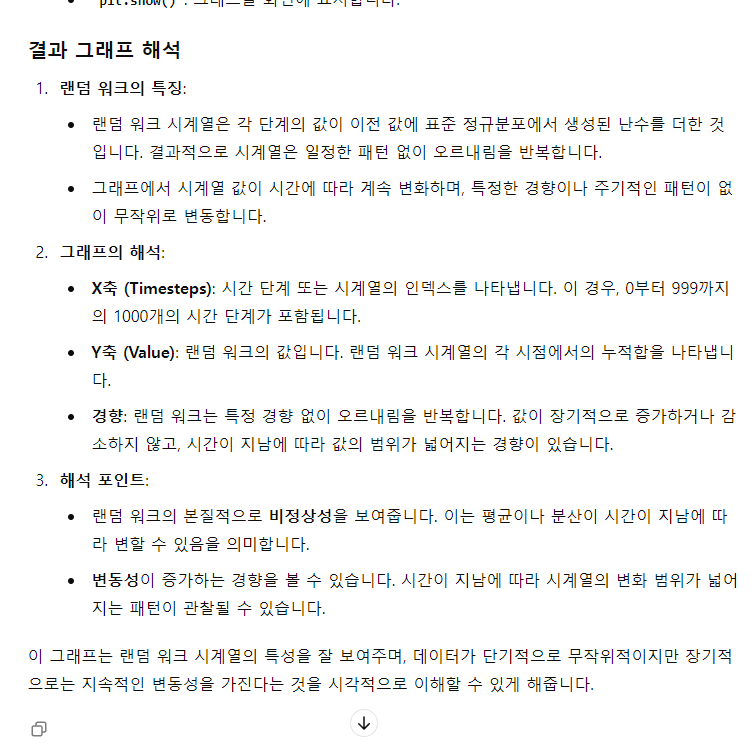

In [27]:
#np.diff 함수는 NumPy 라이브러리의 함수로, 배열의 차분을 계산하는 데 사용됩니다. 차분(difference)은 시계열 데이터의 변화를 분석하는 데 유용하며, 주로 시계열의 정상성을 평가하기 위해 사용됩니다. 
diff_random_walk = np.diff(random_walk, n=1)

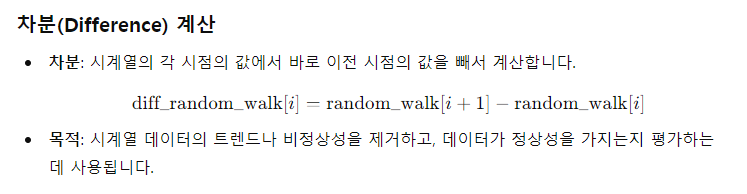

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

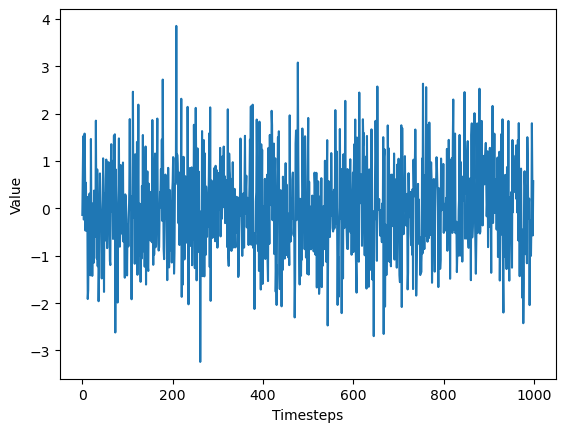

In [28]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk, linestyle="-", label="stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.tight_layout

In [29]:
ADF_result = adfuller(diff_random_walk)
print(ADF_result[0], ADF_result[1])

-31.789310857560615 0.0


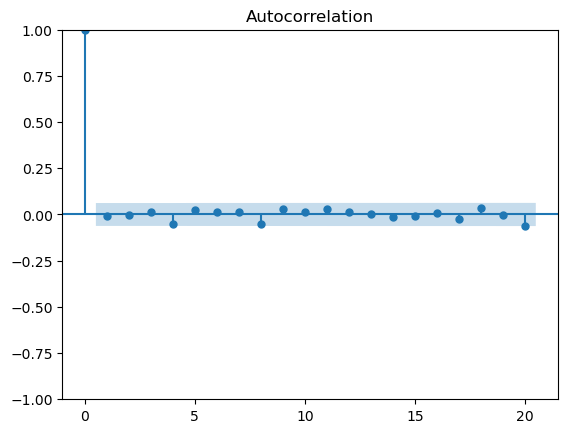

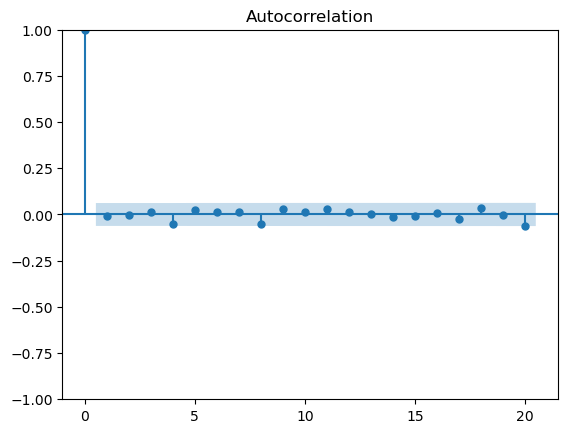

In [30]:
plot_acf(diff_random_walk, lags=20)